In [2]:
# Importing necessary libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Loading the dataset

df = pd.read_csv('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Exploring the Dataset

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [7]:
df["Churn"].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

VISUALIZATION

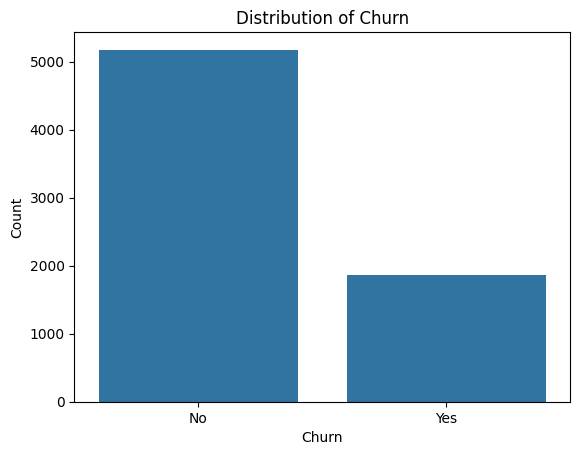

In [8]:
# Target Variable Distribution

sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

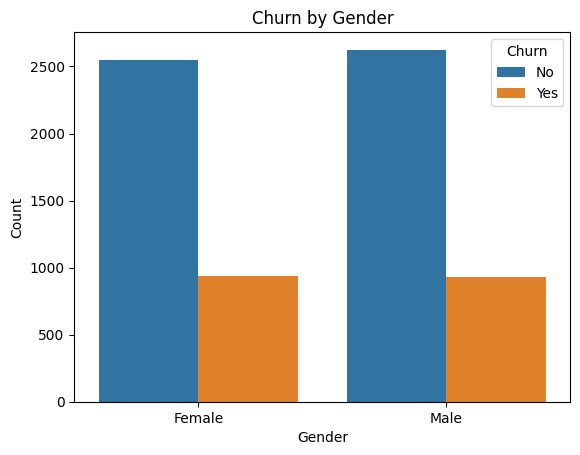

In [9]:
# Gender vs Churn

sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

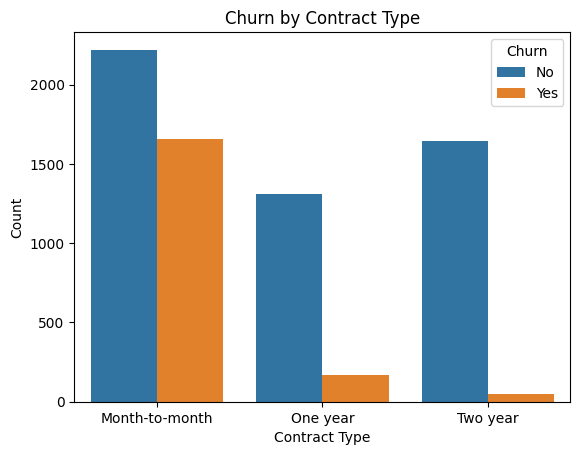

In [10]:
# Contract Type vs Churn

sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

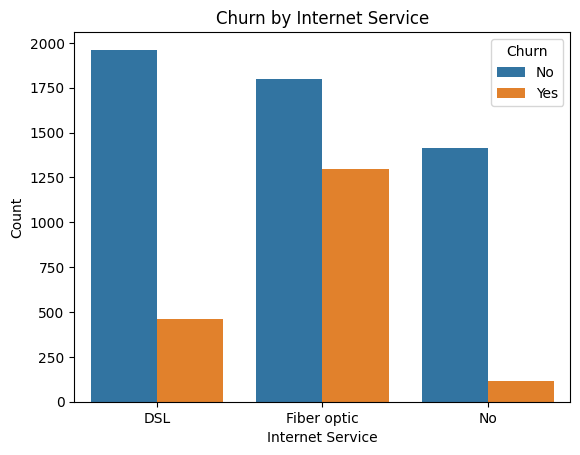

In [11]:
# Internet service vs Churn

sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()


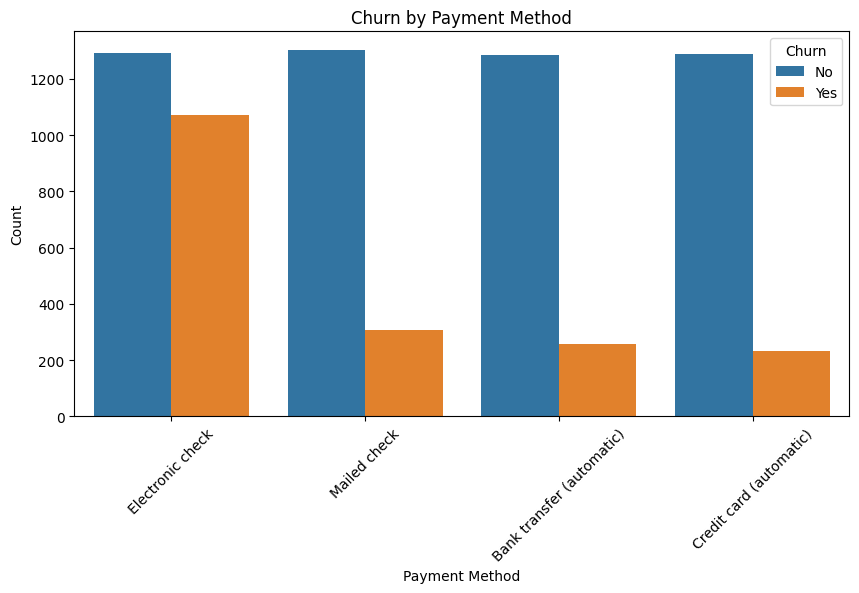

In [12]:
# Payment Method vs Churn
plt.figure(figsize=(10,5))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


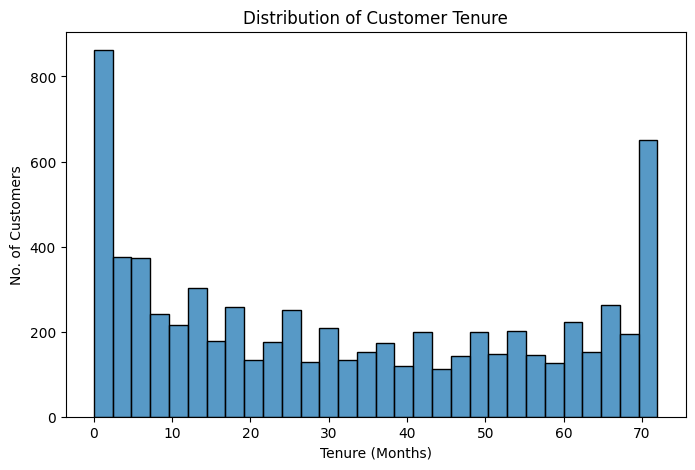

In [13]:
# Tenure Distribution

plt.figure(figsize=(8,5))
sns.histplot(df['tenure'], bins=30, kde=False)
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('No. of Customers')
plt.show()

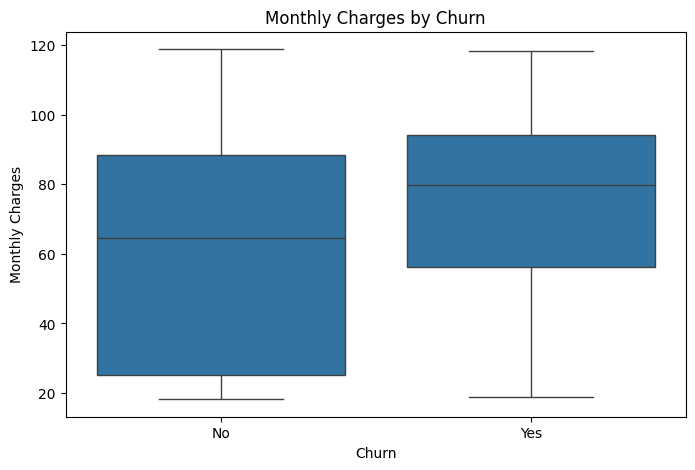

In [14]:
# Monthly Charges vs Churn

plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()


In [15]:
# Drop Customer ID since its not useful for analysis
df_corr = df.drop(columns=['customerID'])

#Select only Numeric Columns
numeric_df = df_corr.select_dtypes(include=['int64', 'float64'])




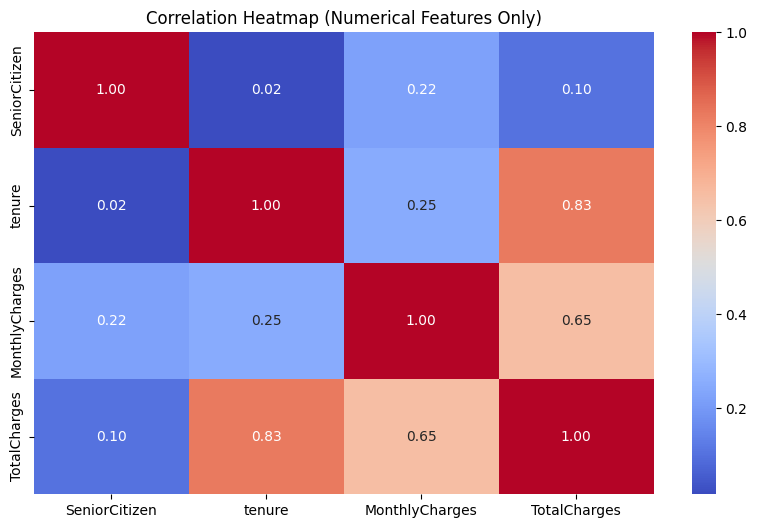

In [16]:
# Correlation Heatmap (Numerical Features Only)

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap (Numerical Features Only)')
plt.show()

Data Preprocessing

In [17]:
# drop unnecessary columns

df = df.drop(columns = ['customerID'])

In [18]:
# Handling Missing Values

df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# Filling Missing Numeric Values With Median

df = df.fillna(df['TotalCharges'].median())



Contract        SeniorCitizen
Month-to-month  0                3068
Two year        0                1550
One year        0                1283
Month-to-month  1                 807
One year        1                 190
Two year        1                 145
Name: count, dtype: int64

Encode Categorical variables

In [ ]:
# Label Encoding  (for Yes/No or Binary Columns)

from sklearn.preprocessing import LabelEncoder

Binary_Columns = ['gender',  'Partner', 'Dependents', 'PhoneService','PaperlessBilling', 'Churn']

label_encoder = LabelEncoder()
for col in Binary_Columns:
    df[col] = label_encoder.fit_transform(df[col])


In [ ]:
# One Hot Encoding (for Multi-Categorical Columns)

df_encoded = pd.get_dummies(df, columns=['MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup',
                                   'DeviceProtection', 'TechSupport', 'StreamingTV',
                                   'StreamingMovies', 'Contract', 'PaymentMethod'], drop_first=True)


In [ ]:
# Convert all columns to numeric

df_encoded = df_encoded.astype(int)

Feature Scaling


In [ ]:
# Normalizing the features having different ranges using Standard Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[['tenure','MonthlyCharges','TotalCharges']] = pd.DataFrame(scaler.fit_transform(df_encoded[['tenure','MonthlyCharges','TotalCharges']]),
                                                                       columns=['tenure','MonthlyCharges','TotalCharges'])


In [ ]:
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.277445,0,1,-1.172988,-0.994411,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0.066327,1,0,-0.275697,-0.173258,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,-1.236724,1,1,-0.375396,-0.959534,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0.514251,0,0,-0.740959,-0.194890,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,-1.236724,1,1,0.189564,-0.940550,1,...,0,0,0,0,0,0,0,0,1,0


Saving the Cleaned Dataset 

In [ ]:
df_encoded.to_csv('../data/processed/processed_churn.csv', index=False)
